
# MA124 Maths by Computer: Assignment 2
Student number: <font color='blue'>2109968</font> 

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. 

The basic reproduction ratio is given by $\displaystyle{R_0 = \frac{\beta}{\gamma}}$.

The Python code cells below compute numerical solutions to this model by calling the SciPy ODE solver odeint. 

This program is used to help understand and model pandemics like Covid-19. Specifically these models can be used to help us understand how to minimise deaths and 'flatten the curve'. This can be seen in part B and C where the comparison of the curves I(t) for each case show how the curve is flattened by pre-vaccinating people in the prior immunity case or by enforcing a mask mandate of 43 days as chosen.


---

# Part A. Baseline case
Results are shown for specific parameter values: $\beta = 0.3$ and $\gamma = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals in a population of size $N=10^6$. 

The first plot below shows the time series of the three variables. Time can be thought of a measured in days so 180 days is about 6 months. The model captures the basics of the disease progression where the number of infectious individuals initially grows (outbreak). Eventually the number of infections individuals reaches a peak and thereafter decreases. 

The second plot shows a phase portrait in the $(S,I)$ plane. A diamond shows the initial condition, a circle shows the final state and a star shows the maximum. The plots show a different view of the disease progression. Note that at the final time, there are some individuals who did not contract the disease ($S(t_f) > 0$). 


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [4]:
# --- Call the ODE solver and extract solutions for baseline case --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

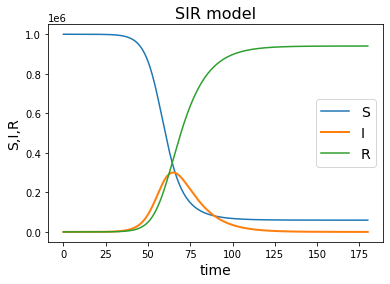

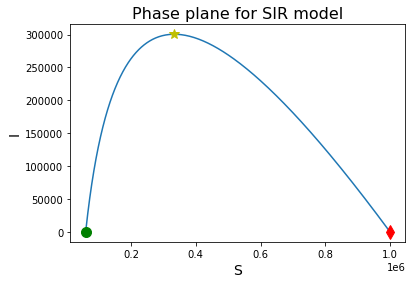

At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418
The maximum value of I is  300464


In [5]:

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()     

# plot maximum
Imax= np.amax(I)
# find index of maximum
I_i= np.where(I==Imax)
# find max S
Smax= S[I_i]


# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
# plot max
plt.plot(Smax,Imax, 'y*', markersize = 10)
plt.show()

# --- Report the final values of S, I, R and the maximum value of I --- #

print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum value of I is ", round(Imax))

# Part B. Prior immunity
One can study the basic effect of immunity with the SIR model by starting from an initial
condition in which a percentage of the population is in the class already. Think of these as
individuals who have been removed from and put into , either because they have prior
natural immunity or because they have been vaccinated. Either way, they are immune and
hence not susceptible at the start of the disease outbreak.

Here I have plotted 3 graphs, the first comparing the S, I and R values for the baseline case from part A and for the case where 20% of the population (200,000) people had prior immunity i.e: modelling how a pandemic is affected by mass vaccinations taking place beforehand. The third graph shows the time series for with
and without prior immunity. By excluding and , the comparison between the
two infection curves is clearer. This highlights the 'flattening of the curve' effect on the number of infected patients when introducing prior immunity.

The second (phase-plane) graph compares the number of susceptible people against the number of infected for both the baseline and for the case where 200,000 people where priorly immune. It may also be useful to note that the gradient of this curve models the rate of change of infected people with respect to the number of people susceptible.

A diamond shows the initial condition, a circle shows the final state and a star shows the maximum. The plots show a different view of the disease progression. Note that at the final time, there are some individuals who did not contract the disease ($S(t_f) > 0$). 


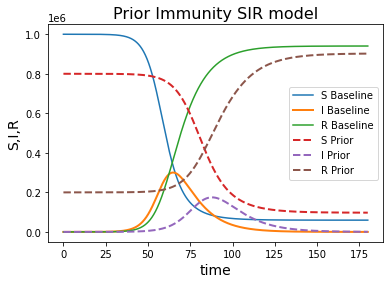

At the end of the simulation, the final value of S, I, and R in the baseline case are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418
The maximum value of I is  300464
At the end of the simulation, the final value of S, I, and R accounting for prior immunity are (rounded):
S2(t=tf) = 97384
I2(t=tf) = 635
R2(t=tf) = 901982
The maximum value of I is  174846


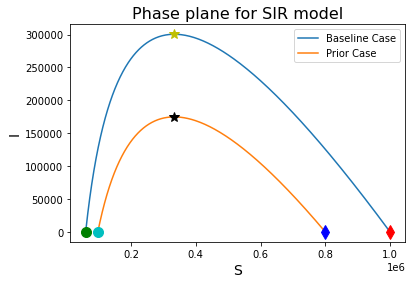

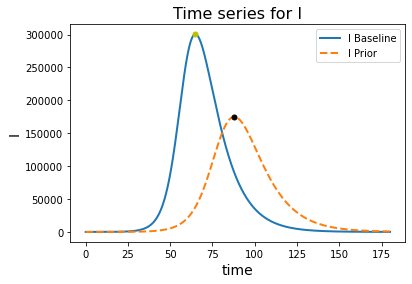

In [6]:
# calculate prior immunity initial SIR values
S1 = (10.0**6 - 200005)
I1 = 5
R1 = 200000
y1 = np.array([S1, I1, R1])

# --- Call the ODE solver and extract solutions for prior immunity case --- #
  
y_sol2 = odeint(SIR, y1, t)

# extract S, I, R from the solution array y
S2 = y_sol2[:,0]
I2 = y_sol2[:,1]
R2 = y_sol2[:,2]

# plot the time evolution of the baseline S, I, R
plt.plot(t, S, label="S Baseline")
plt.plot(t, I, lw = 2, label="I Baseline")
plt.plot(t, R, label="R Baseline")

# plot the time evolution of the prior immunity S2, I2, R2
plt.plot(t, S2,'--', lw = 2,label="S Prior")
plt.plot(t, I2,'--', lw = 2,label="I Prior")
plt.plot(t, R2,'--', lw = 2,label="R Prior")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("Prior Immunity SIR model", fontsize=16)
plt.legend(fontsize=10)
plt.show()  

# Prior Immunity Case
# plot maximum 
Imax2= np.amax(I2)
# find index of maximum
I_i2= np.where(I2==Imax2)
# find max S
Smax2= S2[I_i2]

# plot the evolution in the S,I phase plane
plt.plot(S, I, label="Baseline Case")
plt.legend(fontsize=10)

# plot the evolution in the S,I phase plane
plt.plot(S2, I2, label="Prior Case")
plt.legend(fontsize=10)
# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# Baseline Case
# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
# plot max
plt.plot(Smax,Imax, 'y*', markersize = 10)

# Prior Immunity Case
# put some markers to show initial and final states
plt.plot(S2[0], I2[0], 'bd', markersize = 10)
plt.plot(S2[-1], I2[-1], 'co', markersize = 10)
# plot max
plt.plot(Smax2,Imax2, 'k*', markersize = 10)


# --- Report the final values of S, I, R and the maximum value of I --- #
# for baseline case
print("At the end of the simulation, the final value of S, I, and R in the baseline case are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum value of I is ", round(Imax))

# for prior immunity case
print("At the end of the simulation, the final value of S, I, and R accounting for prior immunity are (rounded):")
print("S2(t=tf) =", round(S2[-1]))
print("I2(t=tf) =", round(I2[-1]))
print("R2(t=tf) =", round(R2[-1]))
print("The maximum value of I is ", round(Imax2))


plt.show()

# time series for I with and without immunity
plt.plot(t, I, lw = 2, label="I Baseline")
plt.plot(t, I2,'--', lw = 2,label="I Prior")
plt.legend(fontsize=10)

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Time series for I", fontsize=16)

# Calculate at which time the max I occurs and plot it
Tmax=t[I_i]
Tmax2=t[I_i2]
plt.plot(Tmax,Imax, 'y.', markersize = 10)
plt.plot(Tmax2,Imax2, 'k.', markersize = 10)

plt.show()

# Part C. Social distancing
One can model [social distancing](https://en.wikipedia.org/wiki/Social_distancing), or a mask mandate, by varying the parameter $\beta$ that controls the rate of infection. We will use the following simple approximation. When a mask mandate is in effect, the parameter $\beta$ will be reduced to 0.24, otherwise it will be 0.3, as in the baseline case. More specifically, we will consider $\beta$ to change between these two values according to:

$$
\beta = 0.3 \quad {\rm if} \quad t \le t_{m} \\
\beta = 0.24 \quad {\rm if} \quad t_{m} < t \le t_{m}+30 \\
\beta = 0.3 \quad {\rm if} \quad t_{m}+30 < t 
$$

$t_m$ corresponds to the time the mask mandate goes into effect. We consider a 30-day mandate period and so $t_m+30$ corresponds to the time the mask mandate is lifted. 

In principle one need not restrict to such specific circumstances, but this will simplify things. Note, that with $\beta$ varying with time, the ODE is no longer autonomous.

I observed that $t_m$ most flattens the curve when it is 43, meaning that it is most effective when the mask mandate begins 43 days into the pandemic.

Like for Part B, the first graph shows the effect that the mask mandate happening 43 days in has on the SIR values and the third curve is included to again show the 'flattening the curve' effect that the mask mandate has. 
The second graph quite simply shows how no matter the number of susceptible people, introducing a mask mandate has quite a large effect, overall decreasing the number of infected greatly

A diamond shows the initial condition, a circle shows the final state and a star shows the maximum. The plots show a different view of the disease progression. Note that at the final time, there are some individuals who did not contract the disease ($S(t_f) > 0$). 



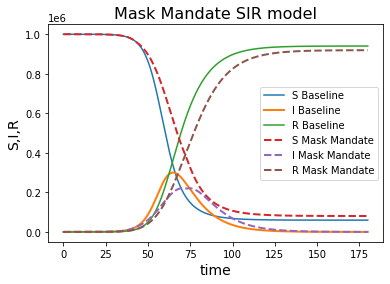

At the end of the simulation, the final value of S, I, and R in the baseline case are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418
The maximum value of I is  300464
At the end of the simulation, the final value of S, I, and R when using a mask mandate are (rounded):
S2(t=tf) = 80500
I2(t=tf) = 174
R2(t=tf) = 919326
The maximum value of I is  221851


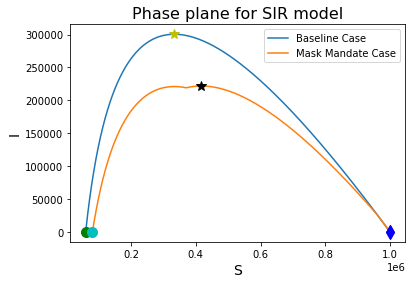

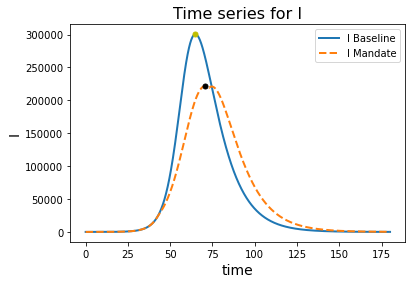

In [7]:
def mmSIR(y, t):
    # returns RHS of the SIR model for mask mandate case
    S, I, R = y
    tm= 43
    if t <= tm:
        beta=0.3
    elif t>tm and t<=tm+30:
        beta=0.24
    else:
        beta=0.3
        
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

# solve ODE with new SIR values
y_sol3 = odeint(mmSIR, y0, t)
# extract S, I, R from the solution array y
S3 = y_sol3[:,0]
I3 = y_sol3[:,1]
R3 = y_sol3[:,2]

# plot the time evolution of the baseline S, I, R
plt.plot(t, S, label="S Baseline")
plt.plot(t, I, lw = 2, label="I Baseline")
plt.plot(t, R, label="R Baseline")

# plot the time evolution of the mask mandate S3, I3, R3
plt.plot(t, S3,'--', lw = 2,label="S Mask Mandate")
plt.plot(t, I3,'--', lw = 2,label="I Mask Mandate")
plt.plot(t, R3,'--', lw = 2,label="R Mask Mandate")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("Mask Mandate SIR model", fontsize=16)
plt.legend(fontsize=10)
plt.show()  

# plot maximum for Mask Mandate
Imax3= np.amax(I3)
# find index of maximum
I_i3= np.where(I3==Imax3)
# find max S
Smax3= S3[I_i3]

# plot the evolution in the S,I phase plane
plt.plot(S, I, label="Baseline Case")
plt.legend(fontsize=10)

# plot the evolution in the S,I phase plane
plt.plot(S3, I3, label="Mask Mandate Case")
plt.legend(fontsize=10)
# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# Baseline Case
# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)

# plot max
plt.plot(Smax,Imax, 'y*', markersize = 10)

# Mask Mandate Case
# put some markers to show initial and final states
plt.plot(S3[0], I3[0], 'bd', markersize = 10)
plt.plot(S3[-1], I3[-1], 'co', markersize = 10)

# plot max
plt.plot(Smax3,Imax3, 'k*', markersize = 10)

# --- Report the final values of S, I, R and the maximum value of I --- #
# for baseline case
print("At the end of the simulation, the final value of S, I, and R in the baseline case are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum value of I is ", round(Imax))

# for mask mandate case
print("At the end of the simulation, the final value of S, I, and R when using a mask mandate are (rounded):")
print("S2(t=tf) =", round(S3[-1]))
print("I2(t=tf) =", round(I3[-1]))
print("R2(t=tf) =", round(R3[-1]))
print("The maximum value of I is ", round(Imax3))

plt.show()

# time series for I with and without mask mandate
plt.plot(t, I, lw = 2, label="I Baseline")
plt.plot(t, I3,'--', lw = 2,label="I Mandate")
plt.legend(fontsize=10)

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Time series for I", fontsize=16)

# Calculate at which time the max I occurs and plot it
Tmax=t[I_i]
Tmax3=t[I_i3]
plt.plot(Tmax,Imax, 'y.', markersize = 10)
plt.plot(Tmax3,Imax3, 'k.', markersize = 10)

plt.show()